# 구대웅

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
data=pd.read_csv("../data/test12.csv")
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Class
0    284315
1       492
dtype: int64


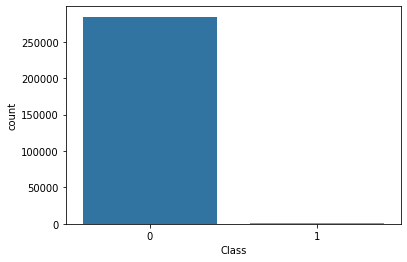

In [57]:
sns.countplot(data["Class"])
print(data.groupby("Class").size())

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

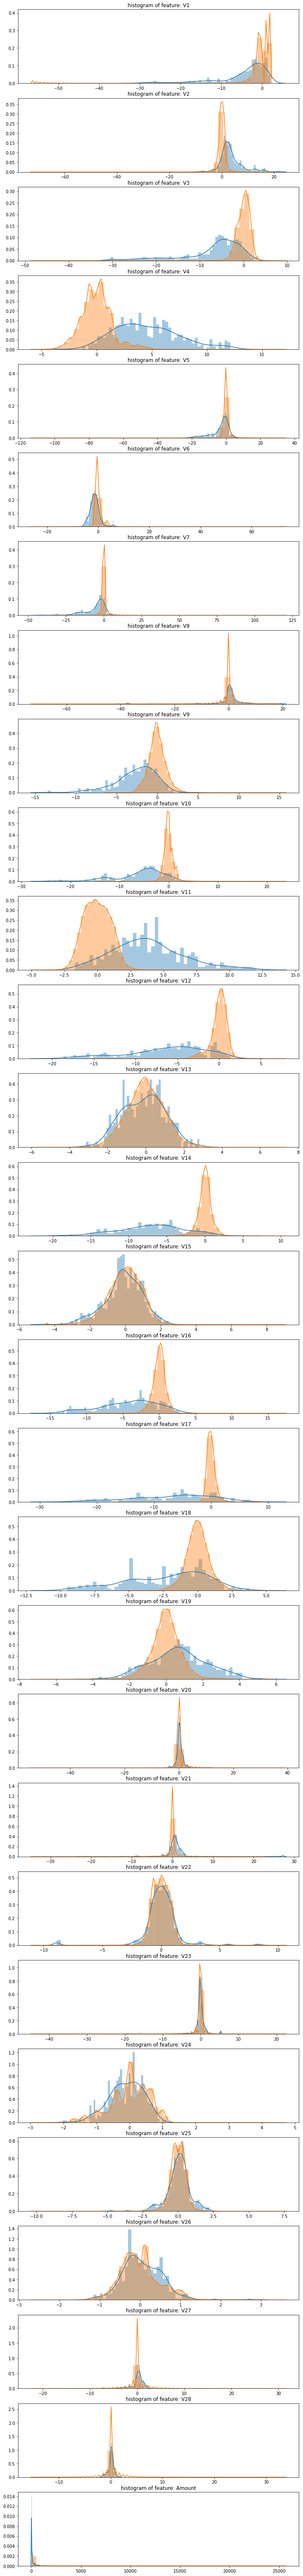

In [47]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.gridspec as gridspec
columns=data.columns[1:30]
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(29, 1)
for i, cn in enumerate(data[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [35]:
data[data.isnull()].any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [60]:
from sklearn.model_selection import train_test_split
y=data["Class"]
X=data.drop('Class',1)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [67]:
from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()
lr_clf.fit(X_train, y_train)
accuracy = lr_clf.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  99.90028369989608 %


In [68]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [69]:
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[71052    30]
 [   41    79]]
정확도: 0.9990, 정밀도: 0.7248, 재현율: 0.6583


In [70]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.6900


In [71]:
from sklearn.metrics import roc_auc_score
pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값 : {:.4f}'.format(roc_score))

ROC AUC 값 : 0.8290


In [77]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (70657,)
반환된 precisions 배열의 Shape: (70658,)
반환된 recalls 배열의 Shape: (70658,)
thresholds 5 sample: [2.04709161e-10 2.05368873e-10 2.05828226e-10 2.11395803e-10
 2.12236144e-10]
precisions 5 sample: [0.00169604 0.00168193 0.00168196 0.00168198 0.001682  ]
recalls 5 sample: [1.         0.99166667 0.99166667 0.99166667 0.99166667]
샘플 추출을 위한 임계값 배열의 index 10개: [    0    15    30 ... 70620 70635 70650]
샘플용 10개의 임곗값:  [0. 0. 0. ... 1. 1. 1.]
샘플 임계값별 정밀도:  [0.002 0.002 0.002 ... 0.816 0.913 0.875]
샘플 임계값별 재현율:  [1.    0.992 0.992 ... 0.258 0.175 0.058]


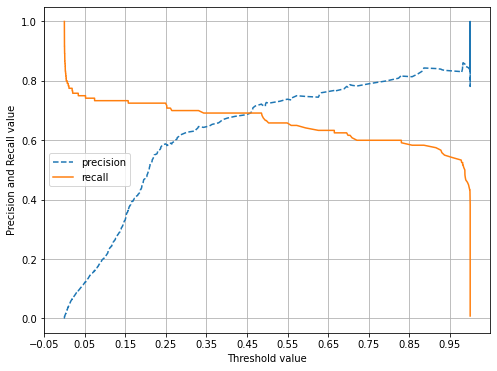

In [78]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [90]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임계값:  0.4
오차 행렬
[[71042    40]
 [   37    83]]
정확도: 0.9989, 정밀도: 0.6748, 재현율: 0.6917, F1:0.6831

임계값:  0.45
오차 행렬
[[71045    37]
 [   37    83]]
정확도: 0.9990, 정밀도: 0.6917, 재현율: 0.6917, F1:0.6917

임계값:  0.5
오차 행렬
[[71052    30]
 [   41    79]]
정확도: 0.9990, 정밀도: 0.7248, 재현율: 0.6583, F1:0.6900

임계값:  0.55
오차 행렬
[[71054    28]
 [   42    78]]
정확도: 0.9990, 정밀도: 0.7358, 재현율: 0.6500, F1:0.6903

임계값:  0.6
오차 행렬
[[71056    26]
 [   44    76]]
정확도: 0.9990, 정밀도: 0.7451, 재현율: 0.6333, F1:0.6847


In [91]:
from sklearn.preprocessing import Binarizer
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [92]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되 임계값을 5step으로 추출
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개: ', thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index], 2))

# 5 step으로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개:  [  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86
  91  96 101 106 111 116 121 126 131 136 141 146 151 156 161 166 171 176
 181 186 191 196 201 206 211 216 221 226 231 236 241 246 251 256 261 266
 271 276 281]
샘플용 10개의 임계값:  [1.   1.   1.   1.   0.98 0.86 0.7  0.56 0.49 0.25 0.07 0.02 0.01 0.01
 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]
샘플 임계값별 FPR:  [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001 0.006 0.018
 0.028 0.041 0.044 0.068 0.081 0.094 0.109 0.131 0.15  0.184 0.195 0.224
 0.245 0.278 0.325 0.413 0.432 0.455 0.467 0.508 0.523 0.568 0.571 0.601
 0.612 0.643 0.662 0.67  0.691 0.723 0.754 0.793 0.841 0.882 0.904 0.936
 0.961 0.969 0.971 0.979 0.983 0.989 0.991 0.994 0.998]
샘플 임계값별 TPR:  [0.008 0.125 0.2   0.283 0.517 0.583 0.625 0.65  0.692 0.708 

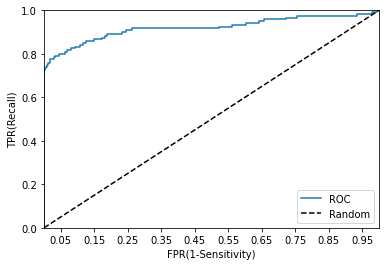

In [93]:
def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR 값을반환 받음
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    # ROC곡선을 그래프로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])